In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# no need to set sep if it's a comma
# if it's ; in example we do : df = pd.read_csv("housing.csv", sep=";")
data = pd.read_csv("housing.csv")


In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# we see that total_bedrooms contain null values but not too much so we can drop it
data.dropna(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]


In [59]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

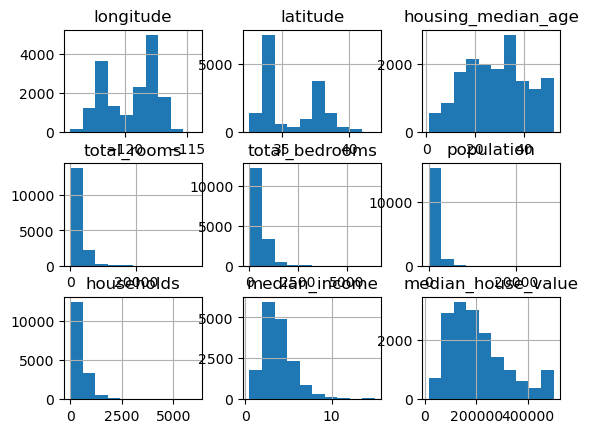

In [8]:
# distribution of each feature
# For each numeric column, show me how its values are distributed
train_data.hist()

In [9]:
# correlation between features
# correlation is only for numeric value , columns with strings will be error
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925009,-0.110574,0.044210,0.068028,0.100987,0.053133,-0.010555,-0.042613
latitude,-0.925009,1.000000,0.013241,-0.036302,-0.065682,-0.111123,-0.070098,-0.086337,-0.148578
housing_median_age,-0.110574,0.013241,1.000000,-0.360163,-0.319088,-0.298574,-0.300883,-0.115959,0.110880
total_rooms,0.044210,-0.036302,-0.360163,1.000000,0.930418,0.861101,0.917554,0.197762,0.131290
total_bedrooms,0.068028,-0.065682,-0.319088,0.930418,1.000000,0.882282,0.978377,-0.008239,0.047547
population,0.100987,-0.111123,-0.298574,0.861101,0.882282,1.000000,0.913088,0.003010,-0.028476
households,0.053133,-0.070098,-0.300883,0.917554,0.978377,0.913088,1.000000,0.012411,0.064166
median_income,-0.010555,-0.086337,-0.115959,0.197762,-0.008239,0.003010,0.012411,1.000000,0.685432
median_house_value,-0.042613,-0.148578,0.110880,0.131290,0.047547,-0.028476,0.064166,0.685432,1.000000


<Axes: >

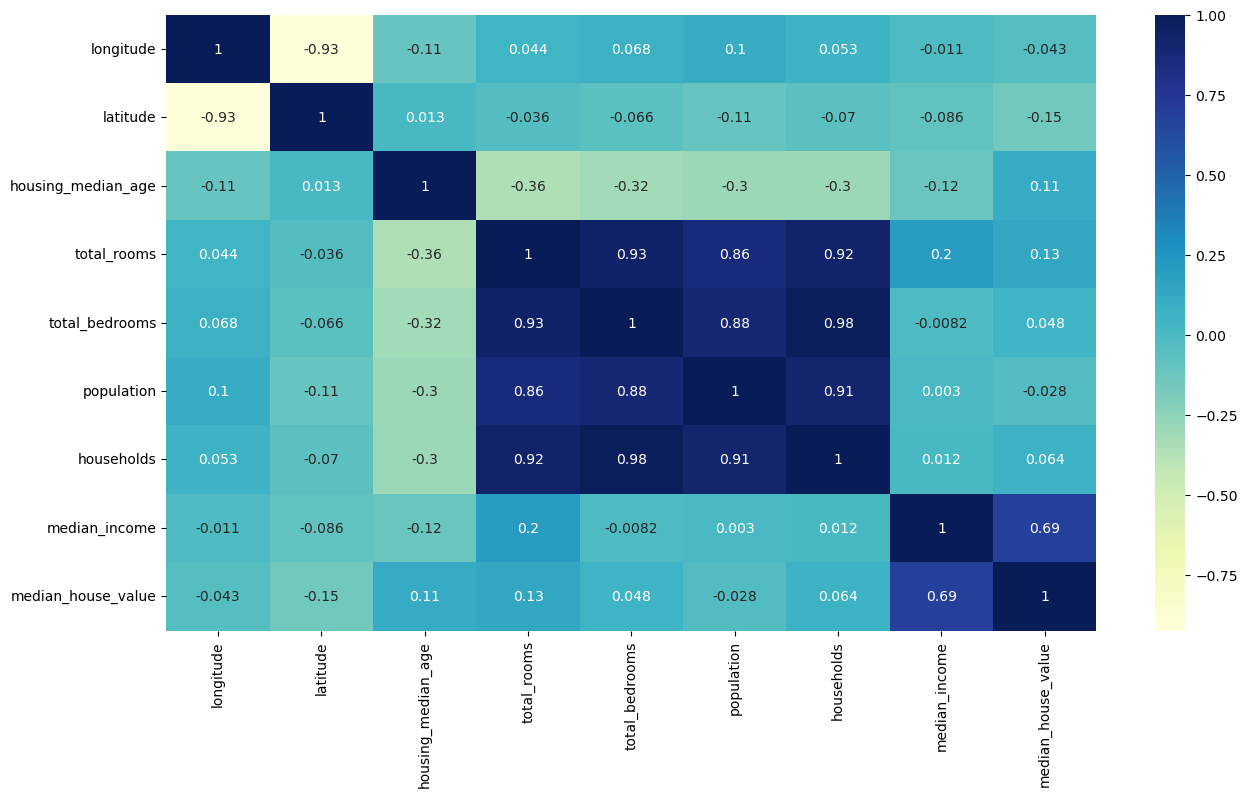

In [10]:
plt.figure(figsize=(15,8))
# annotation True to see the values
# colormap : cmap
sns.heatmap(train_data.corr(numeric_only=True),annot=True ,cmap="YlGnBu")
# What's interesting to us is the correlation with the median house value
# We see what features are most corrolated with the target
# so that feature can be a good predictor for the target

In [11]:
# the distribution of total room is rectangle (search the name)
# This distribution don't provide us a good information
# same for total_bedrooms population households
# we will see the log of this feature what it looks like
# +1 to avoid the value 0
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['total_rooms'] + 1) 


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

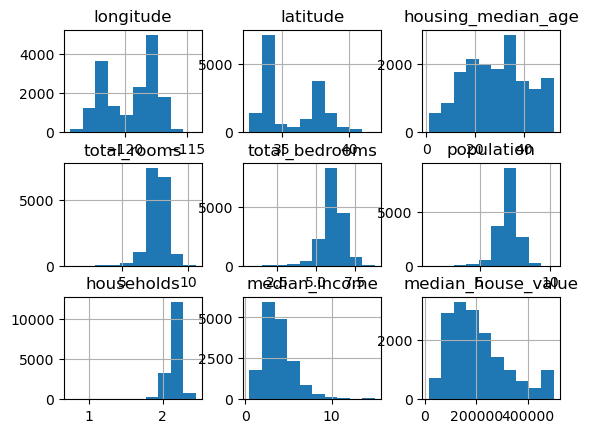

In [12]:
train_data.hist()
# now we see that we have A Gaussian bell curve for those features 
# A Gaussian bell curve is a good distribution for features

In [13]:
# to use ocean_proximity feature we have to turn it into a numerical value first
# with categorical values , it's often make sense to not ordinal encode them 
# not just give them numbers 1 2 ...
# it's better to take categorical values and turn them into binary features 0/1

train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7300
INLAND        5223
NEAR OCEAN    2131
NEAR BAY      1854
ISLAND           4
Name: count, dtype: int64

In [15]:
# One-Hot Encoding:
# Each category gets its own column
# and rows are marked 1 where the category matches.
# You can't feed these strings directly into a model — so we convert them into columns.
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9939,False,False,False,True,False
19210,True,False,False,False,False
5837,True,False,False,False,False
1218,False,True,False,False,False
16502,False,True,False,False,False
...,...,...,...,...,...
4813,True,False,False,False,False
6672,True,False,False,False,False
15157,True,False,False,False,False
2304,False,True,False,False,False


In [18]:
# we join this one hot encoding result to train data
# and drop the ocean_proximity 
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"] , axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9939,-122.28,38.22,42.0,4.672829,2.944439,3.713572,1.735688,7.5197,275000.0,False,False,False,True,False
19210,-122.71,38.46,41.0,7.588324,6.180017,6.873164,2.150404,2.9050,159300.0,True,False,False,False,False
5837,-118.34,34.19,41.0,7.329750,5.976351,7.070724,2.119833,2.8750,192400.0,True,False,False,False,False
1218,-120.88,38.16,8.0,7.615791,5.961005,6.908755,2.153597,4.0109,125900.0,False,True,False,False,False
16502,-121.13,37.74,31.0,6.519147,4.976734,6.261492,2.017453,2.4598,97100.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,-118.28,34.05,35.0,7.395108,6.732211,8.011023,2.127649,1.5565,152500.0,True,False,False,False,False
6672,-118.11,34.15,40.0,7.576097,6.234411,6.946014,2.148979,2.6172,196100.0,True,False,False,False,False
15157,-117.06,32.99,16.0,7.175490,5.283204,6.570883,2.101141,6.2683,180700.0,True,False,False,False,False
2304,-119.76,36.83,20.0,8.075583,6.102559,7.215975,2.205588,5.2595,110900.0,False,True,False,False,False


<Axes: >

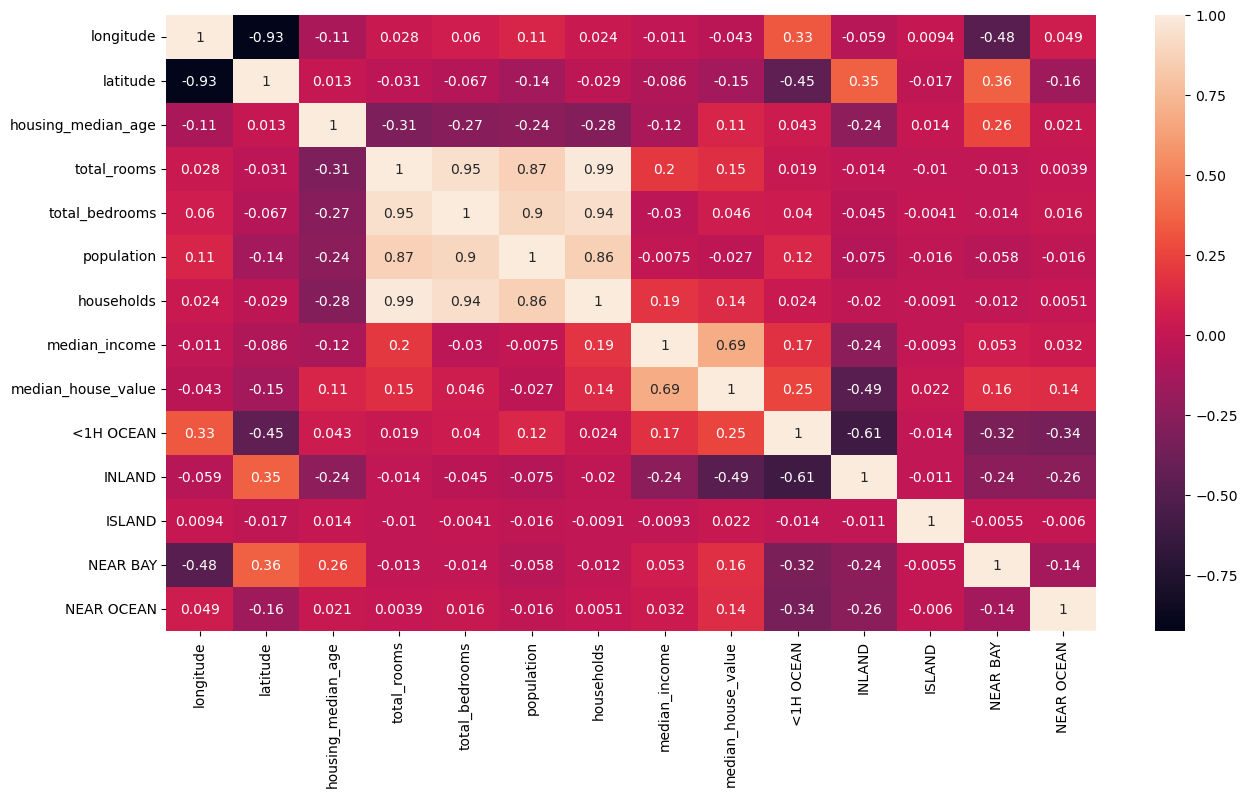

In [22]:
# Use it to understand relationships between features.
# Use it to select features for a machine learning model.
# If two columns have very high correlation, you might drop one to avoid redundancy.
# +1 → Strong positive correlation (as one goes up, the other goes up)
# -1 → Strong negative correlation (as one goes up, the other goes down)
# 0 → No correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

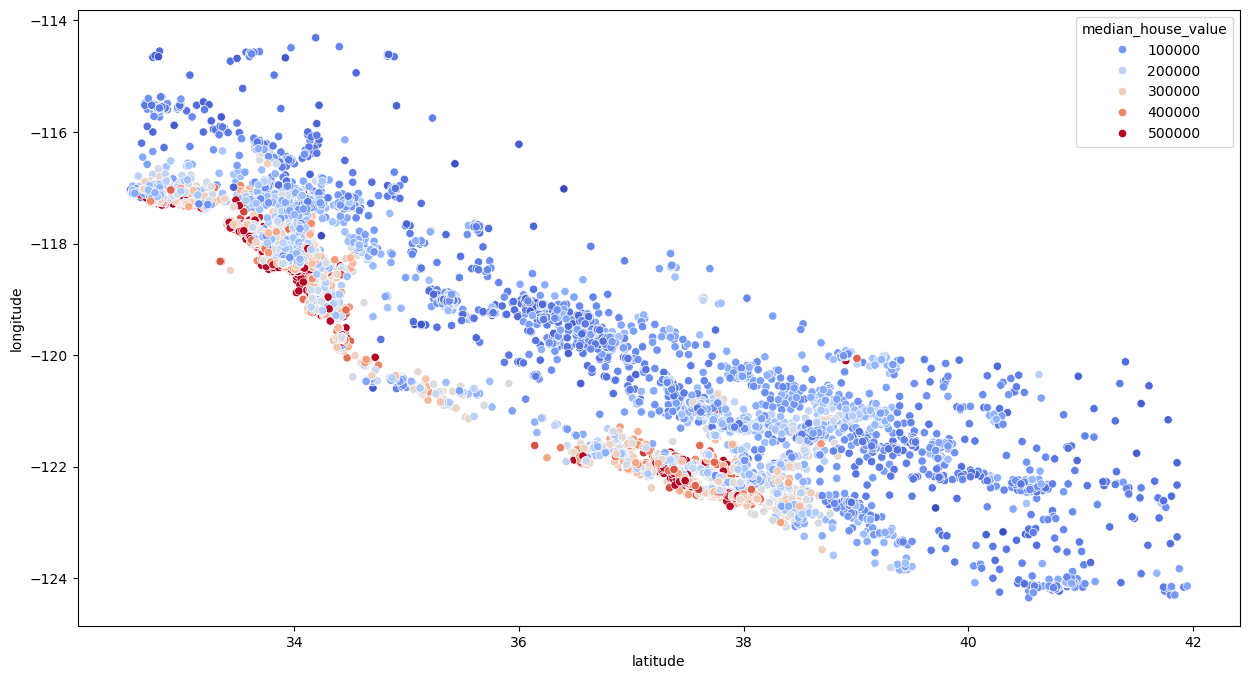

In [25]:
#Represents a house or block from the dataset
#Is placed according to its location (latitude x & longitude y)
#Has a color based on house price
#This is a geographic heatmap without a real map, useful to spot clusters or trends.
#Visual proof that location influences house prices
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [27]:
# feature engineering
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

<Axes: >

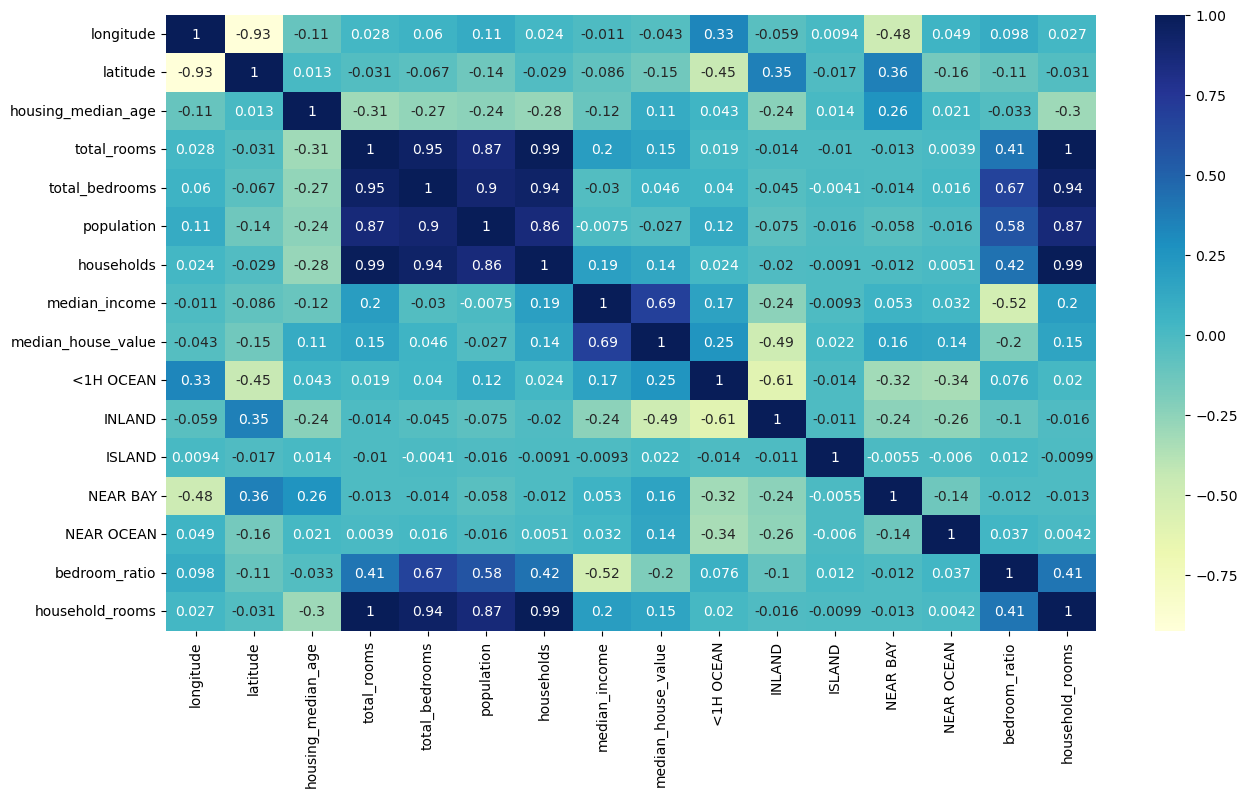

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [32]:
# we see how ho correlation between target median house value and features
# may be not interesting but feature engineered have more correlation
# this is the importance of freature ingeneering
# come up with features with good correlation
#drop features with coorelation near 0


# we should scale the data before fit
#Many machine learning models (especially those that rely on distance or gradients)
# work much better when all features have similar ranges.

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 9939 to 11561
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16352 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   <1H OCEAN           16512 non-null  bool   
 10  INLAND              16512 non-null  bool   
 11  ISLAND              16512 non-null  bool   
 12  NEAR BAY            16512 non-null  bool   
 13  NEAR OCEAN          16512 non-null  bool   
 14  bedroom_ratio       16352 non-null  float64
 15  household_rooms     16512 non-null  float64
dtypes: boo

In [38]:
train_data.dropna(inplace=True)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train , y_train)

LinearRegression()

In [60]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['total_rooms'] + 1) 

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"] , axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]



In [61]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16361,-121.30,38.01,29.0,7.736307,6.109248,7.103322,2.167488,3.2788,100000.0,False,True,False,False,False,0.789685,3.569251
11826,-121.04,39.00,21.0,8.308938,6.594413,7.536364,2.230975,4.8051,174300.0,False,True,False,False,False,0.793653,3.724353
6309,-117.99,34.04,30.0,8.404920,6.866933,8.301025,2.241233,3.1850,168300.0,True,False,False,False,False,0.817014,3.750132
15628,-122.40,37.80,52.0,7.647309,6.343880,6.825460,2.157248,4.2015,412500.0,False,False,False,True,False,0.829557,3.544937
8152,-118.10,33.81,36.0,6.753438,4.990433,6.113682,2.048136,5.1993,246000.0,True,False,False,False,False,0.738947,3.297358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7516,-118.25,33.91,36.0,7.576097,5.902633,7.026427,2.148979,3.1111,119300.0,True,False,False,False,False,0.779113,3.525440
6955,-118.06,33.98,42.0,7.202661,5.497168,6.423247,2.104459,5.4381,186900.0,True,False,False,False,False,0.763213,3.422572
7313,-118.19,33.98,33.0,5.023881,4.430817,5.942799,1.795732,1.4224,189600.0,True,False,False,False,False,0.881951,2.797679
13050,-121.32,38.59,24.0,8.384576,6.814543,7.673223,2.239067,2.5035,123700.0,False,True,False,False,False,0.812747,3.744673


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 4158 to 16366
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4081 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   <1H OCEAN           4128 non-null   bool   
 10  INLAND              4128 non-null   bool   
 11  ISLAND              4128 non-null   bool   
 12  NEAR BAY            4128 non-null   bool   
 13  NEAR OCEAN          4128 non-null   bool   
 14  bedroom_ratio       4081 non-null   float64
 15  household_rooms     4128 non-null   float64
dtypes: bool

In [62]:
test_data.dropna(inplace=True)

In [63]:
X_test , y_test = test_data.drop(["median_house_value"],axis=1),test_data["median_house_value"]

In [71]:
# scaling the test set
# that's giving us something without column names : NumPy array
X_test_s = scaler.transform(X_test)
# add col names
#  cols = X_train.columns
#  X_test_s_col = pd.DataFrame(X_test_s , columns = cols)

In [72]:
reg.score(X_test , y_test)

0.669829043463299

In [73]:
# Result with scaled data
reg.score(X_test_s_col , y_test)

-191.31002425522786

In [75]:
# The score is terrible because i should change the training 
# the model is trained on unscaled data , so expect unscaled data
# i should now train it on scaled data to see the score of scaled data
reg_on_scaled = LinearRegression()
reg.fit(X_train_s,y_train)
reg.score(X_test_s , y_test)

0.669829043463299

In [81]:
# Trying another model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train , y_train)

RandomForestRegressor()

In [82]:
forest.score(X_test , y_test)

0.9416014145522095

In [84]:
# we will see now if scaling will get us a higher acc

forest.fit(X_train_s , y_train)

RandomForestRegressor()

In [85]:
forest.score(X_test_s , y_test)

0.9421678537213083

In [83]:
# we will try some options here to have a higher accuracy
# we're going to use grid search with cross validation :
# we split data into k fold training on all folds and testing on one
# and we do so on all combinations


In [86]:
from sklearn.model_selection import GridSearchCV

#try several combinations of n_estimators and max_features for my 
# RandomForestRegressor. For each combination, train the model using 
# 5-fold cross-validation and see which one gives the best result."

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[3,10,30] ,
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest , param_grid , cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
# we can get a worse score even if we use the best estimator with the best 
# parametres
# to get the best parametres
grid_search.best_params_
# to get the best model 
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [91]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s , y_test)
# we can adjust the values in grid_search to have better results
# if the params that have the best score are the max or the min in the list :
# you better to go in thid direction
# because maybe the optimum value is not in your grid

0.9367121154374182

In [ ]:
# we can try other parametres 
forest = RandomForestRegressor()

param_grid_ = {
    "n_estimators" : [100,200,300],
    "min_samples_split" : [2,4],
    "max_depth" : [None , 4, 8]
}

grid_search_ = GridSearchCV(forest , param_grid_ , cv=5 ,
                        scoring = "neg_mean_squared_error",
                        return_train_score=True)

grid_search_.fit(X_train_s , y_train)

In [96]:
grid_search_.best_params_
print("-----------")
grid_search_.best_estimator_

{'max_features': 8, 'n_estimators': 30}